In [1]:
!pip install opencv-python pillow matplotlib


In [2]:
!pip install bing-image-downloader
from bing_image_downloader import downloader

# Download 100+ images of, e.g., 'cats'
downloader.download("cats", limit=100, output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60)


[%] Downloading Images to /content/dataset/cats


[!!]Indexing page: 1

[%] Indexed 95 Images on Page 1.


[%] Downloading Image #1 from https://cats.com/wp-content/uploads/2021/10/cat-personality.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallup.net/wp-content/uploads/2019/09/61456-cats.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapercave.com/wp/wp2114656.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://images2.fanpop.com/images/photos/7000000/Cats-cats-7017645-1600-1200.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.pexels.com/photos/1643457/pexels-photo-1643457.jpeg?cs=srgb&amp;dl=adorable-animal-cat-1643457.jpg&amp;fm=jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgNxApPFQwJP6RiA7Ewoy6xpWLM-l2o45zChlEoFmq4E762x0rrR2t4snzrfOY-yS7qA3ZfU2jbcy1G3OwolAKdbDwftDw1n5q4iZ82BosGuancISmFhqPOHB6fQaJL9JIGUQ2FADhGDvw0DeWJRWXmYQdh6X8Z68CvQoBA

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance


In [4]:
os.makedirs("output/enhanced", exist_ok=True)
os.makedirs("output/edges", exist_ok=True)


In [6]:
input_folder = "dataset/cats"
enhanced_folder = "output/enhanced"
edges_folder = "output/edges"

for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        path = os.path.join(input_folder, filename)

        # Open with PIL and Enhance Brightness
        image = Image.open(path)
        enhancer = ImageEnhance.Brightness(image)
        enhanced_img = enhancer.enhance(1.5)  # 1.0 = original, >1.0 = brighter

        # Save enhanced image
        enhanced_path = os.path.join(enhanced_folder, filename)

        # Convert RGBA to RGB before saving
        if enhanced_img.mode == 'RGBA':
            enhanced_img = enhanced_img.convert('RGB')
        elif enhanced_img.mode == 'P':  # Also handle palette mode
            enhanced_img = enhanced_img.convert('RGB')

        enhanced_path = os.path.join(enhanced_folder, filename)
        enhanced_img.save(enhanced_path)


        # Convert to grayscale and apply Canny edge detection
        img_cv = cv2.imread(enhanced_path)
        gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 100, 200)

        # Save edge-detected image
        edge_path = os.path.join(edges_folder, filename)
        cv2.imwrite(edge_path, edges)


In [8]:
import shutil
shutil.make_archive("enhanced_images", 'zip', "output/enhanced")
shutil.make_archive("edges_images", 'zip', "output/edges")


'/content/edges_images.zip'

🔗 Original Image Path: dataset/cats/Image_35.jpg


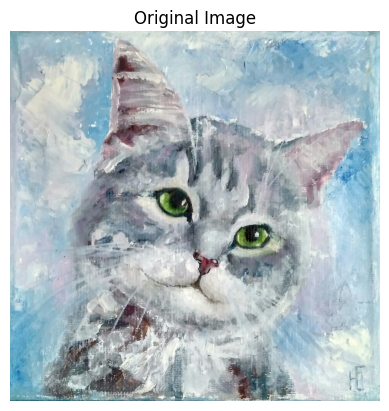

🔗 Enhanced Image Path: output/enhanced/Image_35.jpg


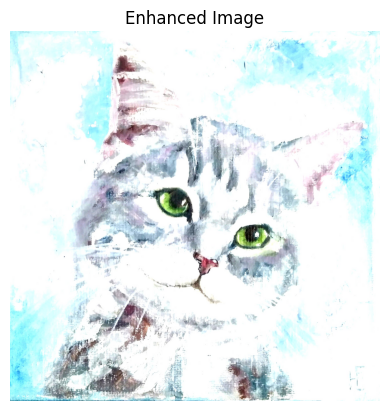

🔗 Edge Detected Image Path: output/edges/Image_35.jpg


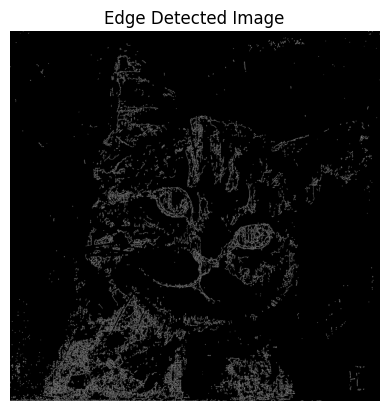

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

# Pick one example image name
example_name = os.listdir("output/enhanced")[0]

# Build file paths
original_path = os.path.join("dataset/cats", example_name)
enhanced_path = os.path.join("output/enhanced", os.path.splitext(example_name)[0] + ".jpg")
edge_path = os.path.join("output/edges", os.path.splitext(example_name)[0] + ".jpg")

# Show original image
print("🔗 Original Image Path:", original_path)
original_img = Image.open(original_path)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Show enhanced image
print("🔗 Enhanced Image Path:", enhanced_path)
enhanced_img = Image.open(enhanced_path)
plt.imshow(enhanced_img)
plt.title("Enhanced Image")
plt.axis("off")
plt.show()

# Show edge-detected image
print("🔗 Edge Detected Image Path:", edge_path)
edge_img = cv2.imread(edge_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(edge_img, cmap='gray')
plt.title("Edge Detected Image")
plt.axis("off")
plt.show()


In [12]:
import shutil

# Zip original images
shutil.make_archive("original_images", 'zip', "dataset/cats")

'/content/original_images.zip'